In [270]:
import matplotlib.pyplot as plt
import numpy as np

Matrice de spin aleatoire de taille N

In [271]:
def init(N):
    Reseau_initial=np.random.random((N,N))
    Reseau=np.zeros((N,N))
    Reseau[Reseau_initial>=0.4]=1
    Reseau[Reseau_initial<0.4]=-1
    return Reseau

On suppose le réseau torique

On définit l'algorithme de Montecarlo

In [272]:
def montecarlo(Res,Temp):
    for i in range(N):
        for j in range(N):
            x=np.random.randint(N)
            y=np.random.randint(N)
            dE= Res[(x+1)%N,y]+Res[(x-1)%N,y]+Res[x,(y+1)%N]+Res[x,(y-1)%N]
            dE=2*dE*Res[x,y]
            if (dE<0.0) or (np.random.random()<np.exp(-dE/Temp)):
                Res[x,y]*=-1
    return Res

Fonction de calcul de l'energie et de la magnetisation de la configuration

In [273]:
def magnetisation(Res):
    count=0
    for i in range(len(Res)):
        for j in range(len(Res)):
            count+=Res[i,j]
    return count/N**2

In [274]:
def energie(Res):
    count=0
    for i in range(len(Res)):
        for j in range(len(Res)):
            Spin=Res[i,j]
            voisin=Res[(i+1)%N,j]+Res[(i-1)%N,j]+Res[i,(j+1)%N]+Res[i,(j-1)%N]
            count+= -Spin*voisin
    return count


Paramètres de simulation

In [285]:
N=20 # taille du reseau
numT=40 #nombre de points de temperature
Equil=200
NumMC=1000 # ici on choisi le nombre d'itération pour l'algorithme de MC

Tc=2/np.log(1+np.sqrt(2)) #Temperature critique théorique calculée par Onsager
T=np.linspace(1.5,3.5,numT) #range de temperature
E=np.zeros(numT) # pour l energie
M=np.zeros(numT) #pour la magnetisation




On run l'algorithme de MC plusieurs fois

In [286]:
Reseau=init(N)

for p in range(numT):
    E0=M0=C0=X=0
    Temp=T[p]
    for k in range (Equil):
        montecarlo(Reseau,Temp)
    for k in range(NumMC):
        montecarlo(Reseau,Temp)
        Energie=energie(Reseau)
        Magn=magnetisation(Reseau)
        E1=E0 + Energie
        M1=M0 + Magn
        
    E[p]=E1
    M[p]=M1

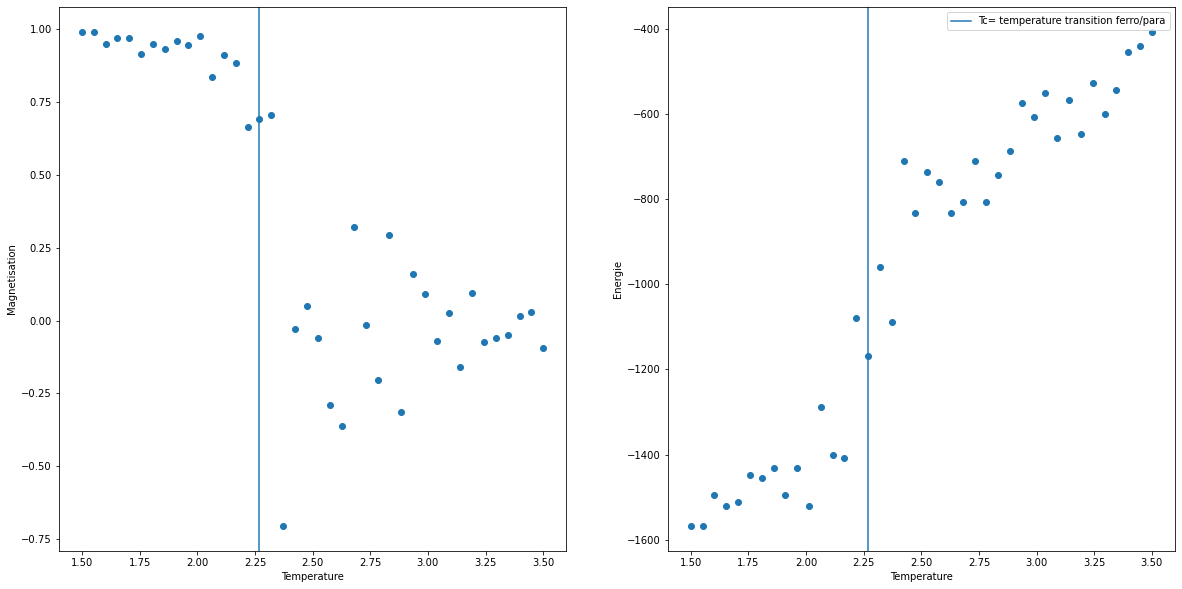

In [287]:
plt.figure(1,figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(T,M)
plt.xlabel("Temperature")
plt.ylabel("Magnetisation")
plt.axvline(x=Tc, label="Tc= temperature transition ferro/para")
plt.subplot(1,2,2)
plt.scatter(T,E)
plt.axvline(x=Tc, label="Tc= temperature transition ferro/para")
plt.xlabel("Temperature")
plt.ylabel("Energie")
plt.legend()
